<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Unsupervised Learning - KMeans & DBSCAN - Location
</b></font> </br></p>

---


# 0  | Install & Import
***

In [ ]:
# Install

In [1]:
# Import
from pandas import read_csv, DataFrame, concat
import numpy as np

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

import plotly.express as px

from yellowbrick.cluster import SilhouetteVisualizer, intercluster_distance

In [2]:
# Warnung ausstellen
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 1 |  Understand

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
Anwendungsfall
</font></p>

Auf Basis von Geodaten kann ein Clustering erfolgen.




<p><font color='black' size="5">
Daten laden
</font></p>



In [4]:
filename = "https://raw.githubusercontent.com/ralf-42/ML_Intro/main/02_daten/05_tabellen/location_data.csv"
df = read_csv(filename, encoding="ISO-8859-1")

,City,Country Code,Country,IP Address,Lat,Long,region_code,region,areacode,metro_code,zipcode
0,Shanghai,CN,China,116.236.209.0,31.0456,121.3997,23,Shanghai,NaN,NaN,NaN
1,Overland Park,US,United States,209.11.132.1,38.8998,-94.7052,KS,Kansas,913.0,616.0,66213
2,Guangzhou,CN,China,113.108.139.2,23.1167,113.2500,30,Guangdong,NaN,NaN,NaN
3,Beijing,CN,China,210.75.217.3,39.9289,116.3883,22,Beijing,NaN,NaN,NaN
4,Chongqing,CN,China,14.104.152.4,29.5628,106.5528,33,Chongqing,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7457,NaN,GB,United Kingdom,62.216.241.62,51.5000,-0.1300,NaN,NaN,NaN,NaN,NaN
7458,Zhengzhou,CN,China,123.6.235.63,34.6836,113.5325,09,Henan,NaN,NaN,NaN
7459,Shanghai,CN,China,222.66.175.64,31.0456,121.3997,23,Shanghai,NaN,NaN,NaN
7460,NaN,CN,China,210.13.108.65,35.0000,105.0000,NaN,NaN,NaN,NaN,NaN


In [5]:
data = df[df.region == "California"]
data.reset_index(inplace=True)

In [7]:
data = data[["Lat", "Long"]]

,Lat,Long
0,37.3394,-121.8950
1,37.3394,-121.8950
2,37.7607,-122.4842
3,32.9570,-117.1979
4,37.7749,-122.4194
...,...,...
283,34.2133,-118.8800
284,33.8138,-117.7986
285,32.7191,-117.1607
286,33.7589,-118.1330


<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Lat     288 non-null    float64
 1   Long    288 non-null    float64
dtypes: float64(2)
memory usage: 4.6 KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,288.0,35.792723,2.179154,32.6401,33.6695,37.33940,37.674325,39.7314
Long,288.0,-120.173467,2.253273,-122.4842,-122.1461,-121.88895,-117.732650,-116.3745


# 2 | Prepare

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Datentyp ermitteln/ändern</br>
✅ Train-Test-Split durchführen</br>
✅ Nicht benötigte Features löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features Kodieren</br>
✅ Numerischer Features skalieren</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Dimensionalität reduzieren</br>
✅ Resampling (Over-/Undersampling)</br>
✅ Pipeline erstellen/konfigurieren</br>

# 3 | Modeling
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>
✅ Hyperparameter Tuning</br>
✅ Cross-Valdiation</br>
✅ Bootstrapping</br>
✅ Regularization</br>


<p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [10]:
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(data)

KMeans(n_clusters=3)

In [11]:
eps = 0.5
min_samples = 5
model_dbscan = DBSCAN(eps=eps, min_samples=min_samples)
model_dbscan.fit(data)

DBSCAN()

# 4 | Evaluate
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>

## 4.1 | KMeans
---

<p><font color='black' size="5">
Silhouette Coefficient KMeans
</font></p>

In [12]:
s_score_kmeans = silhouette_score(
    data[["Lat", "Long"]], model_kmeans.labels_, metric="euclidean"
)
print(f"Silhouettenkoeffizient KMeans: {s_score_kmeans:0.2f}")

Silhouettenkoeffizient KMeans: 0.83


In [13]:
silhouette_vals = silhouette_samples(data, model_kmeans.labels_)
silhouette_vals[:10]

array([0.90766419, 0.90766419, 0.91126678, 0.85761079, 0.91864285,
       0.64074524, 0.90079822, 0.72846335, 0.92439979, 0.92931509])

In [14]:
unique_clusters = np.unique(model_dbscan.labels_)
for cluster in unique_clusters:
    if cluster != -1:  # Ausreißer ignorieren
        cluster_avg_silhouette = np.mean(
            silhouette_vals[model_kmeans.labels_ == cluster]
        )
        print(
            f"Cluster {cluster}: ∅ Silhouettenkoeffizient = {cluster_avg_silhouette:.3f}"
        )

Cluster 0: ∅ Silhouettenkoeffizient = 0.905
Cluster 1: ∅ Silhouettenkoeffizient = 0.850
Cluster 2: ∅ Silhouettenkoeffizient = 0.589


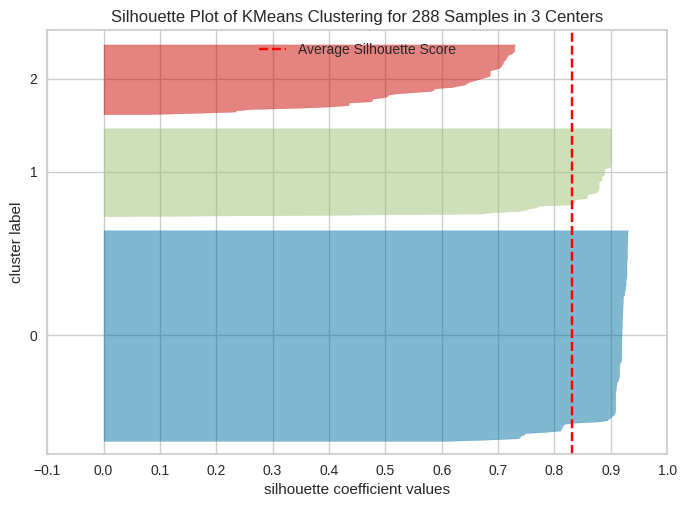

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 288 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
visualizer = SilhouetteVisualizer(model_kmeans, colors="yellowbrick")
visualizer.fit(data)
visualizer.show()

In [ ]:
visualizer = intercluster_distance(model_kmeans, data, random_state=42)

<p><font color='black' size="5">
Centroide
</font></p>

In [16]:
print("Centroide:")
DataFrame(model_kmeans.cluster_centers_, columns=data.columns)

Centroide:


,Lat,Long
0,37.639887,-122.080722
1,32.863264,-117.155541
2,33.959958,-118.272507


## 4.2 | DBSCAN
---

<p><font color='black' size="5">
Silhouette Coefficent DBSCAN
</font></p>

In [17]:
s_score_dbscan = silhouette_score(
    data[["Lat", "Long"]], model_dbscan.labels_, metric="euclidean"
)
print(f"Silhouettenkoeffizient DBScan: {s_score_dbscan:0.2f}")

Silhouettenkoeffizient DBScan: 0.67


In [18]:
silhouette_vals = silhouette_samples(data, model_dbscan.labels_)
silhouette_vals[:10]

array([0.71559494, 0.71559494, 0.68390959, 0.82361979, 0.70329946,
       0.65372625, 0.81751686, 0.6321317 , 0.69836154, 0.72543678])

In [19]:
unique_clusters = np.unique(model_dbscan.labels_)
for cluster in unique_clusters:
    if cluster != -1:  # Ausreißer ignorieren
        cluster_avg_silhouette = np.mean(
            silhouette_vals[model_dbscan.labels_ == cluster]
        )
        print(
            f"Cluster {cluster}: ∅ Silhouettenkoeffizient = {cluster_avg_silhouette:.3f}"
        )

Cluster 0: ∅ Silhouettenkoeffizient = 0.687
Cluster 1: ∅ Silhouettenkoeffizient = 0.748
Cluster 2: ∅ Silhouettenkoeffizient = 0.756


## 4.3 | Visualiserung
---

<p><font color='black' size="5">
Aufbau Datenwürfel für Visualisierung
</font></p>

In [20]:
data["KMeans"] = DataFrame(model_kmeans.labels_).astype("string")
data["DBSCAN"] = DataFrame(model_dbscan.labels_).astype("string")

<p><font color='black' size="5">
Visualisierung KMeans
</font></p>

In [21]:
fig = px.scatter_mapbox(
    data, lat="Lat", lon="Long", color="KMeans", zoom=5, width=1200, height=600
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title=f"KMean Clustering")
fig.show()

<p><font color='black' size="5">
Visualisierung DBScan
</font></p>

In [22]:
fig = px.scatter_mapbox(
    data, lat="Lat", lon="Long", color="DBSCAN", zoom=5, width=1200, height=600
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title=f"DBSCAN Clustering")
fig.show()

# 5 | Deploy
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>